In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# 1 - Modelo de Classificação Linear

In [2]:
# Inicialização do LDA
lda = LinearDiscriminantAnalysis()

In [3]:
# Carregando conjunto de treino e teste
x_treino = pd.read_excel('Homework03/hw3-data/treino_unskew.xlsx',index_col=False)
x_teste = pd.read_excel('Homework03/hw3-data/teste_unskew.xlsx',index_col=False)
y_treino = pd.read_excel('Homework03/hw3-data/MOS_treino.xlsx',index_col= False)
y_teste = pd.read_excel('Homework03/hw3-data/MOS_teste.xlsx',index_col=False)
y_treino,y_teste = np.ravel(y_treino),np.ravel(y_teste)

In [4]:
lda.fit(x_treino,y_treino) # Treinando o LDA
pred = lda.predict(x_teste) # Testando o LDA
CM = confusion_matrix(y_teste,pred) # Cálculo da confusion matrix
pont = lda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM}')

A análise de discriminante linear conseguiu prever 58.52% das amostras

Confusion Matrix: 
 [[1320  632   10    2   19]
 [ 192 1177    2    0    3]
 [ 126   25    3    0   24]
 [  21   83    0    3    1]
 [ 341  320   11    0   53]]


# 2 - Modelo de Classificação não Linear

## 2.1 - Análise de discriminante quadratico

In [5]:
#Inicialização do QDA
qda = QuadraticDiscriminantAnalysis()

In [6]:
qda.fit(x_treino,y_treino) # Treinando o QDA
pred_qda = qda.predict(x_teste) # Testando o QDA
CM_qda = confusion_matrix(y_teste,pred_qda) # Cálculo da confusion matrix
pont_qda = qda.score(x_teste,y_teste) # Cálculo da precisão
print(f'A análise de discriminante linear conseguiu prever {100*pont_qda:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_qda}')

A análise de discriminante linear conseguiu prever 59.23% das amostras

Confusion Matrix: 
 [[1245  608   37   17   76]
 [ 191 1156    4   12   11]
 [  82   23   16    2   55]
 [  13   61    6   20    8]
 [ 234  307   29    5  150]]


## 2.2 - k-Nearest Neighbors

In [7]:
#Inicialização dos KNN's com k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61]
knn_ = KNeighborsClassifier(n_neighbors=1), KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=7),KNeighborsClassifier(n_neighbors=9),KNeighborsClassifier(n_neighbors=11),KNeighborsClassifier(n_neighbors=13),KNeighborsClassifier(n_neighbors=15),KNeighborsClassifier(n_neighbors=17),KNeighborsClassifier(n_neighbors=19),KNeighborsClassifier(n_neighbors=21),KNeighborsClassifier(n_neighbors=23),KNeighborsClassifier(n_neighbors=25),KNeighborsClassifier(n_neighbors=27),KNeighborsClassifier(n_neighbors=29),KNeighborsClassifier(n_neighbors=31),KNeighborsClassifier(n_neighbors=35),KNeighborsClassifier(n_neighbors=41),KNeighborsClassifier(n_neighbors=45),KNeighborsClassifier(n_neighbors=51),KNeighborsClassifier(n_neighbors=55),KNeighborsClassifier(n_neighbors=61)

In [8]:
pred_knn = np.zeros([len(x_teste),len(knn_)])
CM_knn = np.zeros([len(knn_),5,5])
pont_knn = np.zeros(len(knn_))
for i in range(len(knn_)):
    knn_[i].fit(x_treino,y_treino)
    pred_knn[:,i] = knn_[i].predict(x_teste)
    CM_knn[i,:,:] = confusion_matrix(y_teste,pred_knn[:,i])
    pont_knn[i] = knn_[i].score(x_teste,y_teste)

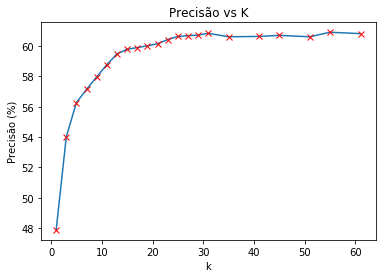

In [9]:
plt.figure(1)
plt.plot([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61],pont_knn*100,'-',[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,35,41,45,51,55,61],pont_knn*100,'rx')
plt.title('Precisão vs K')
plt.ylabel('Precisão (%)')
plt.xlabel('k')
plt.show()

## 2.3 - Rede Neural

In [10]:
NW = MLPClassifier()

In [11]:
NW.fit(x_treino,y_treino)
pred_NW = NW.predict(x_teste)
CM_NW = confusion_matrix(y_teste,pred_NW)
pont_NW = NW.score(x_teste,y_teste)
print(f'A rede neural conseguiu prever {100*pont_NW:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_NW}')

A rede neural conseguiu prever 61.26% das amostras

Confusion Matrix: 
 [[1265  603    0   12  103]
 [ 191 1160    0    9   14]
 [  83   20    1    3   71]
 [  14   59    0   24   11]
 [ 210  286    1    2  226]]


## 2.4 - Support Vector Machine

In [12]:
svc = SVC(gamma = 'scale')

In [13]:
svc.fit(x_treino,y_treino)
pred_svc = svc.predict(x_teste)
CM_svc = confusion_matrix(y_teste,pred_svc)
pont_svc = svc.score(x_teste,y_teste)
print(f'O Support vector machine conseguiu prever {100*pont_svc:.4}% das amostras')
print(f'\nConfusion Matrix: \n {CM_svc}')

O Support vector machine conseguiu prever 60.76% das amostras

Confusion Matrix: 
 [[1284  624    0    7   68]
 [ 190 1172    0    3    9]
 [ 101   23    0    0   54]
 [  21   67    0   15    5]
 [ 230  310    0    2  183]]


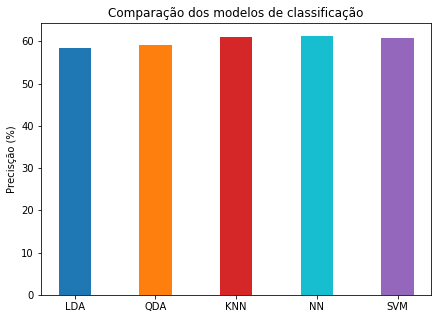

In [26]:
plt.figure(figsize=(7, 5))
plt.title('Comparação dos modelos de classificação')
bars = ['LDA','QDA','KNN','NN','SVM']
plt.bar(np.arange(len(bars)),(100*pont,100*pont_qda,100*max(pont_knn),100*pont_NW,100*pont_svc),0.4,color=['C0', 'C1', 'C3', 'C9','C4'])
plt.xticks(np.arange(len(bars)),bars)
plt.ylabel('Precisção (%)')
plt.show()